## Lotka Voltera
Adapted from https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

In [1]:
# This example describe how to integrate ODEs with scipy.integrate module, and how
# to use the matplotlib module to plot trajectories, direction fields and other
# useful information.
# == Presentation of the Lokta-Volterra Model ==
# We will have a look at the Lokta-Volterra model, also known as the
# predator-prey equations, which are a pair of first order, non-linear, differential
# equations frequently used to describe the dynamics of biological systems in
# which two species interact, one a predator and one its prey. They were proposed
# independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926:
# du/dt =  a*u -   b*u*v
# dv/dt = -c*v + d*b*u*v 
# with the following notations:
# *  u: number of preys (for example, rabbits)
# *  v: number of predators (for example, foxes)   
# * a, b, c, d are constant parameters defining the behavior of the population:    
#   + a is the natural growing rate of rabbits, when there's no fox
#   + b is the natural dying rate of rabbits, due to predation
#   + c is the natural dying rate of fox, when there's no rabbit
#   + d is the factor describing how many caught rabbits let create a new fox
# We will use X=[u, v] to describe the state of both populations.

In [2]:
import numpy as np
import pylab as p
from scipy.integrate import solve_ivp
import deepdish as dd
import numpy as np

In [38]:
ls = []
for i in dset['labels']:
    ls.append((i['params']))
params = np.array(ls)

In [30]:
def create_param_set_train(num_points, lows, highs):
    a_low, b_low, c_low, d_low = lows
    a_high, b_high, c_high, d_high = highs
    
    params = np.zeros((num_points,4))
    for i in range(num_points):
        a = np.random.uniform(a_low,a_high)
        b = np.random.uniform(b_low,b_high)
        c = np.random.uniform(c_low,c_high)
        d = np.random.uniform(d_low,d_high)
        params[i]=np.array([a,b,c,d])
    return params

In [31]:
def create_param_set_test(num_points, lows, highs, away_min=None, away_max=None):
    a_low, b_low, c_low, d_low = lows
    a_high, b_high, c_high, d_high = highs
    
    params = np.zeros((num_points,4))
    i = 0
    while (i<num_points):
        a = np.random.uniform(a_low-away_max,a_high+away_max)
        b = np.random.uniform(b_low-away_max,b_high+away_max)
        c = np.random.uniform(c_low-away_max,c_high+away_max)
        d = np.random.uniform(d_low-away_max,d_high+away_max)
        
        if not (
                    ((a>=a_low-away_min) and (a<=a_high+away_min))
                and ((b>=b_low-away_min) and (b<=b_high+away_min))
                and ((c>=c_low-away_min) and (c<=c_high+away_min))
                and ((d>=d_low-away_min) and (d<=d_high+away_min))
               ):
            params[i]=np.array([a,b,c,d])
            i+=1
        else:
            pass
#             print(np.round([a,b,c,d],2))
    return params

In [33]:
def lotka_volterra(t, X, a, b, c, d):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,  
                  -c*X[1] + d*b*X[0]*X[1] ])

def create_lv_dataset(datapoints, dt, timesteps, X0):
    tmin = 0.0
    tmax = timesteps*dt
    ts = np.linspace(tmin, tmax, timesteps)
    
    n_datapoints = len(datapoints)
    print(f'Creating {n_datapoints} datapoints')
    
    phase_space = np.empty((n_datapoints, timesteps, 2)) # 2 degrees of freedom
    labels = []
    for i,(a,b,c,d) in enumerate(datapoints):
        if i%100==0:
            print(f'Created {i}/{n_datapoints}')
        sol = solve_ivp(lotka_volterra, [tmin, tmax], X0, t_eval = ts, args=(a,b,c,d), method='DOP853')
        phase_space[i] = sol.y.T
        labels.append({'dt': dt, 
#                        'timesteps': timesteps,
                       'initial_state': X0,
                       'params': np.array([a,b,c,d]),
#                        'means': means,
#                        'delta': train_delta,
#                        'num_parameter_samples': num_parameter_samples,
#                        'is_train_set': is_train_set,
#                        'away_low': away_low,
#                        'away_high': away_high,
                       })
    dataset = {'phase_space': phase_space, 'labels': labels}
    return dataset

# TRAIN SET

In [34]:
dt=0.01
timesteps=1000
X0=[5, 3]
num_parameter_samples_=4
means=np.array([2.0, 1.0, 4.0, 1.0])
delta=0.05
lows = means - delta
highs = means + delta

In [35]:
n_datapoints=10000

params_set = create_param_set_train(n_datapoints, lows, highs)
train_dset = create_lv_dataset(params_set, dt, timesteps, X0)
X0_str = '_'.join([f'{a:.1f}' for a in X0])
means_str = '_'.join([f'{a:.1f}' for a in means])
fname = f'../data/lv-r_n_{n_datapoints}_steps_{timesteps}_dt_{dt:.2f}_X0_{X0_str}_means_{means_str}_delta_{delta:.2f}.hd5'
print(fname)
dd.io.save(fname, train_dset)

Creating 10000 datapoints
Created 0/10000
Created 100/10000
Created 200/10000
Created 300/10000
Created 400/10000
Created 500/10000
Created 600/10000
Created 700/10000
Created 800/10000
Created 900/10000
Created 1000/10000
Created 1100/10000
Created 1200/10000
Created 1300/10000
Created 1400/10000
Created 1500/10000
Created 1600/10000
Created 1700/10000
Created 1800/10000
Created 1900/10000
Created 2000/10000
Created 2100/10000
Created 2200/10000
Created 2300/10000
Created 2400/10000
Created 2500/10000
Created 2600/10000
Created 2700/10000
Created 2800/10000
Created 2900/10000
Created 3000/10000
Created 3100/10000
Created 3200/10000
Created 3300/10000
Created 3400/10000
Created 3500/10000
Created 3600/10000
Created 3700/10000
Created 3800/10000
Created 3900/10000
Created 4000/10000
Created 4100/10000
Created 4200/10000
Created 4300/10000
Created 4400/10000
Created 4500/10000
Created 4600/10000
Created 4700/10000
Created 4800/10000
Created 4900/10000
Created 5000/10000
Created 5100/1000

# TEST SET 1

In [36]:
n_datapoints=1000
away_min =  0.00
away_max = 0.01

params_set = create_param_set_test(n_datapoints, lows, highs, away_min, away_max)
val_dset = create_lv_dataset(params_set, dt, timesteps, X0)

X0_str = '_'.join([f'{a:.1f}' for a in X0])
means_str = '_'.join([f'{a:.1f}' for a in means])
away_str = '' if away_min is None else f'_away_{away_min:.2f}_{away_max:.2f}'
fname = f'../data/lv-r_n_{n_datapoints}_steps_{timesteps}_dt_{dt:.2f}_X0_{X0_str}_means_{means_str}_delta_{delta:.2f}{away_str}.hd5'
print(fname)
dd.io.save(fname, val_dset)

Creating 1000 datapoints
Created 0/1000
Created 100/1000
Created 200/1000
Created 300/1000
Created 400/1000
Created 500/1000
Created 600/1000
Created 700/1000
Created 800/1000
Created 900/1000
../data/lv-r_n_1000_steps_1000_dt_0.01_X0_5.0_3.0_means_2.0_1.0_4.0_1.0_delta_0.05_away_0.00_0.01.hd5


# TEST SET 2 

In [37]:
n_datapoints=10000
away_min =  0.01
away_max = 0.02

params_set = create_param_set_test(n_datapoints, lows, highs, away_min, away_max)
test_dset = create_lv_dataset(params_set, dt, timesteps, X0)

X0_str = '_'.join([f'{a:.1f}' for a in X0])
means_str = '_'.join([f'{a:.1f}' for a in means])
away_str = '' if away_min is None else f'_away_{away_min:.2f}_{away_max:.2f}'
fname = f'../data/lv-r_n_{n_datapoints}_steps_{timesteps}_dt_{dt:.2f}_X0_{X0_str}_means_{means_str}_delta_{delta:.2f}{away_str}.hd5'
print(fname)
dd.io.save(fname, test_dset)

Creating 1000 datapoints
Created 0/1000
Created 100/1000
Created 200/1000
Created 300/1000
Created 400/1000
Created 500/1000
Created 600/1000
Created 700/1000
Created 800/1000
Created 900/1000
../data/lv-r_n_1000_steps_1000_dt_0.01_X0_5.0_3.0_means_2.0_1.0_4.0_1.0_delta_0.05_away_0.01_0.02.hd5


In [18]:
# rm ../data/lv*
# !ls -a ../data

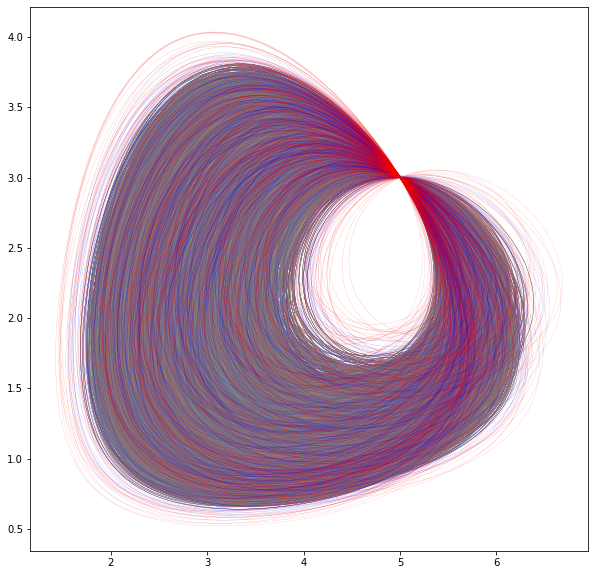

In [23]:
freq=3
p.figure(figsize=(10,10))
for i, traj in enumerate(train_dset['phase_space']):
    if i % freq == 0:
        foxes, rabbits = traj[:,0], traj[:,1]
        p.plot(foxes, rabbits, 'gray', alpha=.8, linewidth=0.2)
for i, traj in enumerate(val_dset['phase_space']):
    if i % freq == 0:
        foxes, rabbits = traj[:,0], traj[:,1]
        p.plot(foxes, rabbits, 'b', alpha=.2, linewidth=0.1)
for i, traj in enumerate(test_dset['phase_space']):
    if i % freq == 0:
        foxes, rabbits = traj[:,0], traj[:,1]
        p.plot(foxes, rabbits, 'r', alpha=.2, linewidth=0.1)
p.show()
p.close()

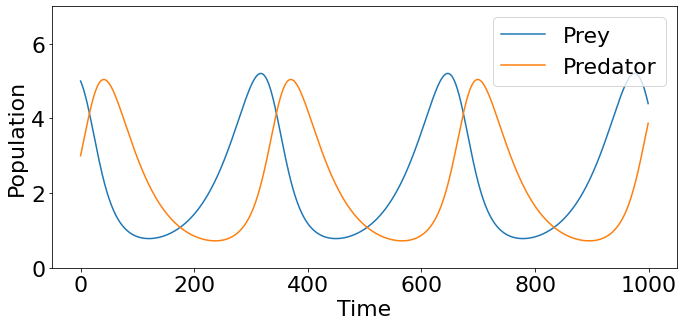

In [13]:
dt=0.01
timesteps=1000
tmin = 0.0
tmax = timesteps*dt
ts = np.linspace(tmin, tmax, timesteps)
X0=[5, 3]
a,b,c,d=[2.0, 0.9, 2.1, 1.0]
sol = solve_ivp(lotka_volterra, [tmin, tmax], X0, t_eval = ts, args=(a,b,c,d), method='DOP853')

import matplotlib.pyplot as plt
import matplotlib
fig = plt.figure(figsize=(10,5))
plt.plot(sol.y[0,:], label=f'Prey')
plt.plot(sol.y[1,:], label=f'Predator')
plt.legend(loc=1)
plt.gca().set_ylim([0,7])

plt.ylabel('Population')
plt.xlabel('Time')
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
plt.tight_layout()

fig.savefig(f'lv-a_{a:.2f}.png')